In [104]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
from pathlib import Path # do pracy z plikami

In [105]:
nodes_path = Path('nodes1.txt').resolve()
edges_path = Path('edges.txt').resolve()

In [106]:
with open(nodes_path, 'r') as f:
    nodes_list = f.read().splitlines()

with open(edges_path, 'r') as f:
    rows = f.read().splitlines()
# jedna krawedz ma wygladac tak (N1,N2)
edges = []
for row in rows:
    e = row.split(' ')
    edge1 = int(e[0])
    edge2 = int(e[1])
    edges.append((edge1, edge2))

print(edges)
len(nodes_list) 
max_num_in_edges = max([max(e) for e in edges])
max_num_in_edges == len(nodes_list) 

[(1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (2, 3), (3, 4), (3, 5), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (3, 16), (3, 17), (3, 18), (3, 19), (3, 20), (3, 21), (3, 22), (3, 23), (3, 24), (3, 25), (3, 26), (3, 28), (3, 29), (3, 30), (4, 5), (4, 17), (4, 18), (4, 20), (4, 21), (4, 22), (4, 23), (4, 25), (5, 17), (5, 18), (5, 20), (5, 21), (5, 22), (5, 23), (5, 25), (6, 17), (6, 24), (6, 26), (6, 31), (6, 32), (6, 33), (7, 8), (7, 10), (7, 11), (7, 12), (7, 13), (7, 14), (7, 15), (7, 16), (7, 21), (7, 24), (7, 25), (7, 26), (7, 27), (7, 28), (7, 29), (7, 30), (7, 34), (7, 35), (7, 36), (7, 37), (8, 9), (8, 19), (8, 34), (9, 19), (10, 11), (10, 12), (10, 13), (10, 14), (10, 15), (10, 16), (10, 21), (10, 24), (10, 25), (10, 26), (10, 27), (10, 2

True

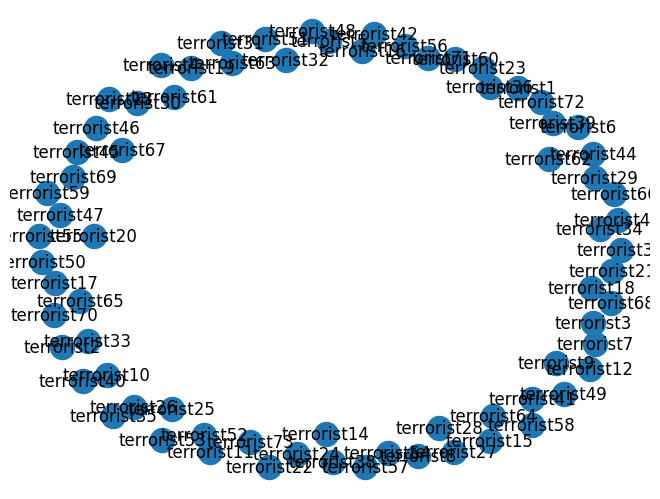

In [107]:
G = nx.Graph() # undirected graph
for i, node in enumerate(nodes_list): # w edges.txt numery ida od jedynki
    G.add_node(i+1, label=node)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

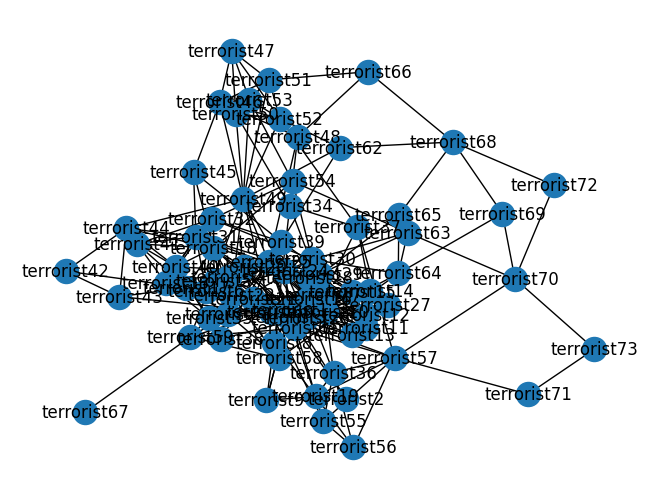

In [108]:
G.add_edges_from(edges)
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'))

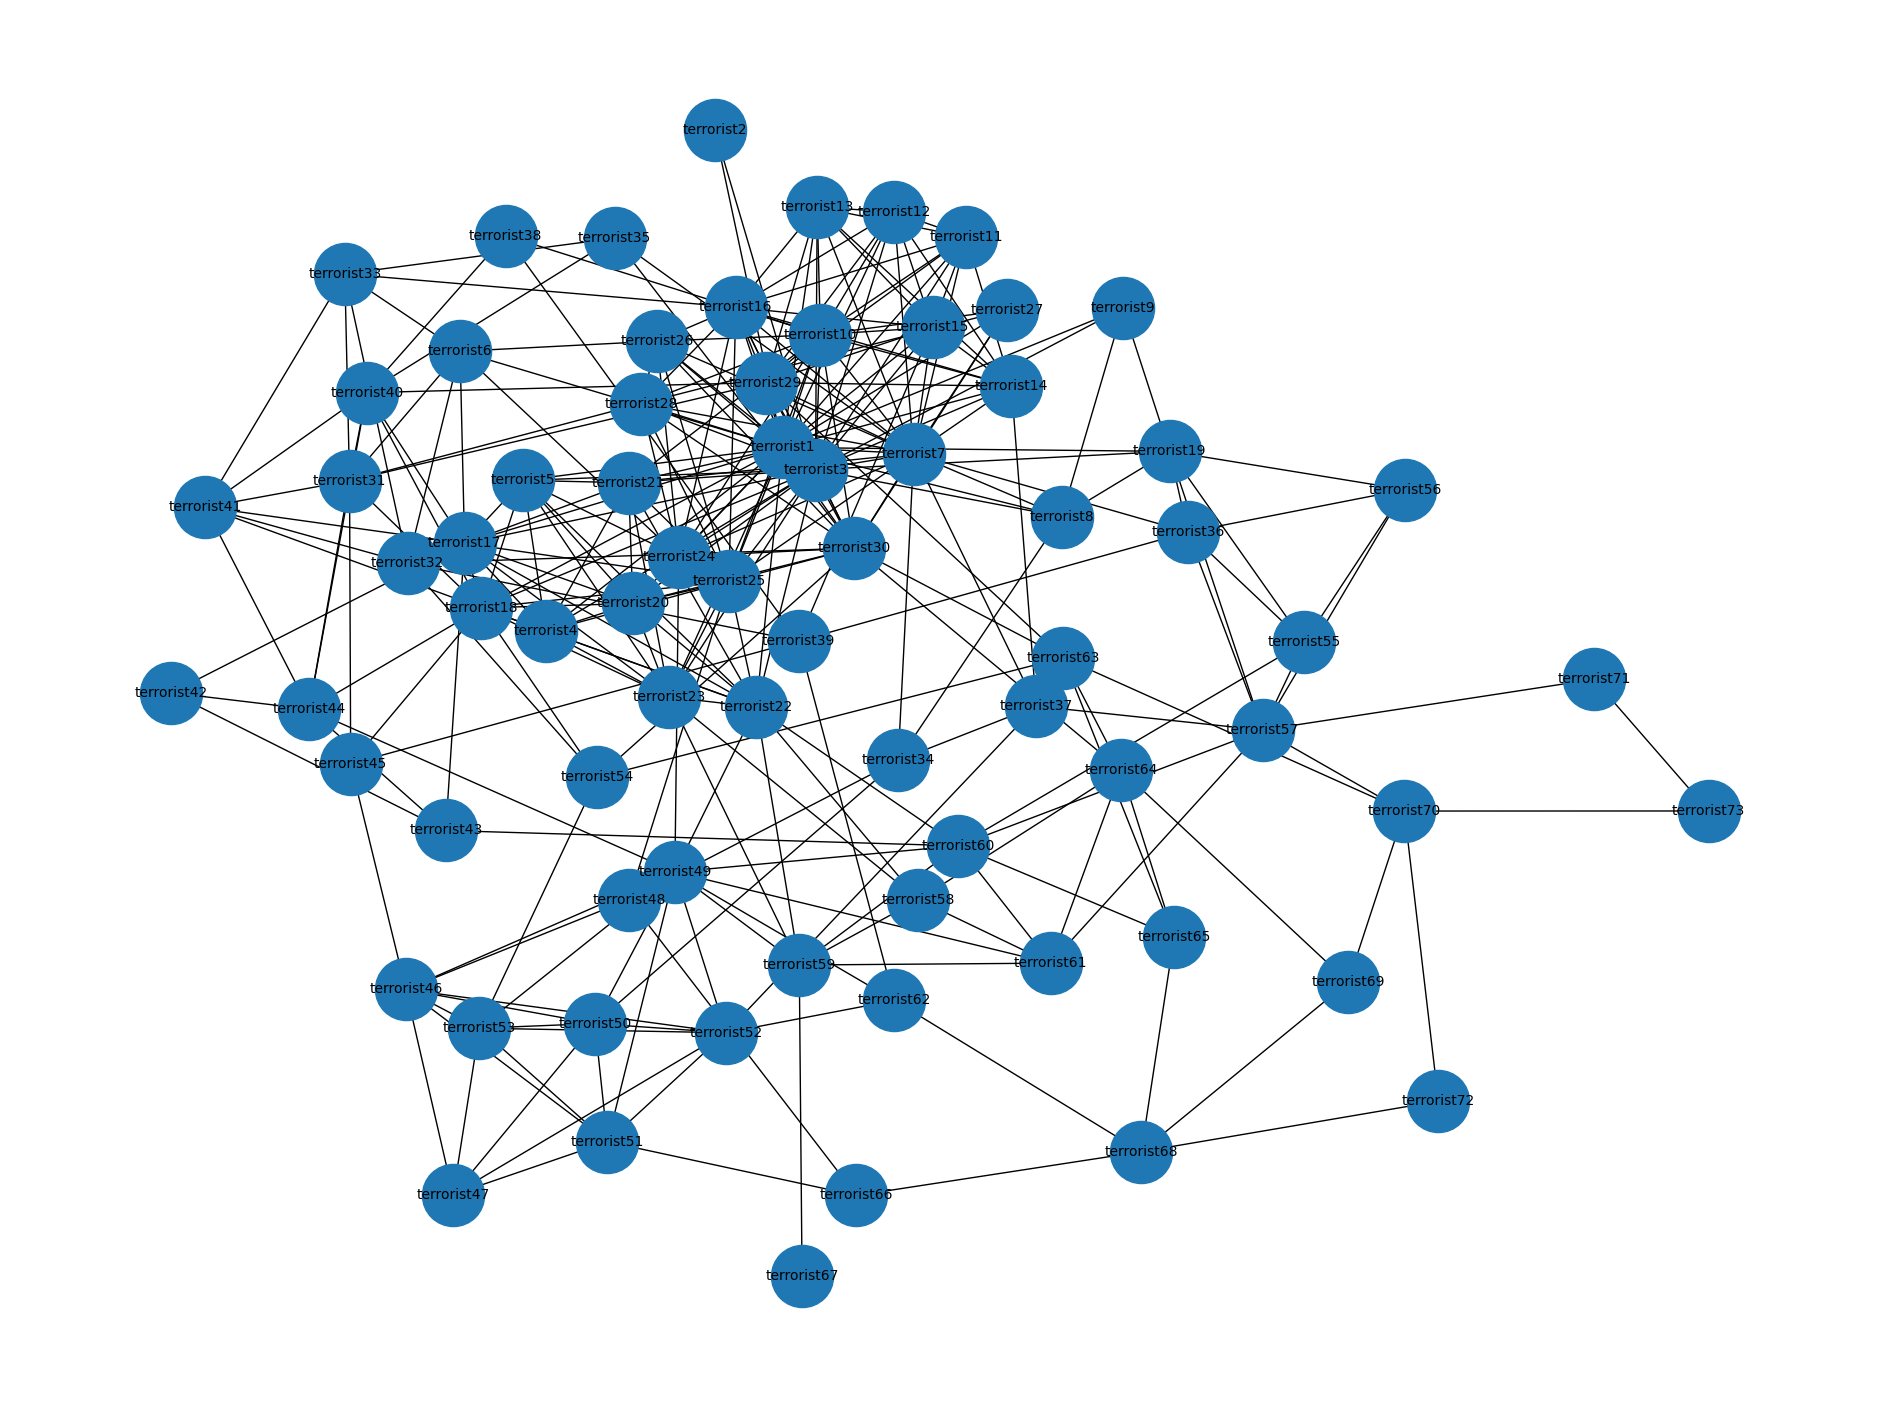

In [109]:
fig, ax = plt.subplots(figsize=(24,18))
pos = nx.kamada_kawai_layout(G)
#pos = nx.layo
nx.draw(G, with_labels=True, labels=nx.get_node_attributes(G, 'label'), ax=ax, pos = pos, node_size=2000, font_size=10)

In [110]:
import random


ListOfNodes = G.nodes()
NumberOfNodes = G.number_of_nodes()

sample = 5
RandomSample = random.sample(ListOfNodes,sample)

G.remove_nodes_from(RandomSample)



C:\Users\Przemek\AppData\Local\Temp\ipykernel_10092\449778851.py:8: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  RandomSample = random.sample(ListOfNodes,sample)


In [111]:
ListofNodes1 = G.nodes()
G.nodes()
G.number_of_nodes()

68

In [112]:
# nx.degree(G) - zwraca liste tupli (node, degree)
def TERRORISTS(G: nx.Graph, n: int) -> list:
  degrees = nx.degree(G)
  # bierze kazzdy element z listy i sortuje po drugim elemencie i odwraca
  degrees = sorted(degrees, key=lambda x: x[1], reverse=True)
  # degree[0] - index wierzcholka, degree[1] - stopien wierzcholka
  degrees = [(G.nodes[degree[0]]['label'],degree[1]) for degree in degrees]
  return degrees[:n] # [0:n] == [:n]
print(f"Terroryści z największą liczbą połączeń, szefowie gangów:")
TERRORISTS(G,5)

Terroryści z największą liczbą połączeń, szefowie gangów:


[('terrorist1', 26),
 ('terrorist7', 18),
 ('terrorist10', 16),
 ('terrorist25', 15),
 ('terrorist30', 15)]

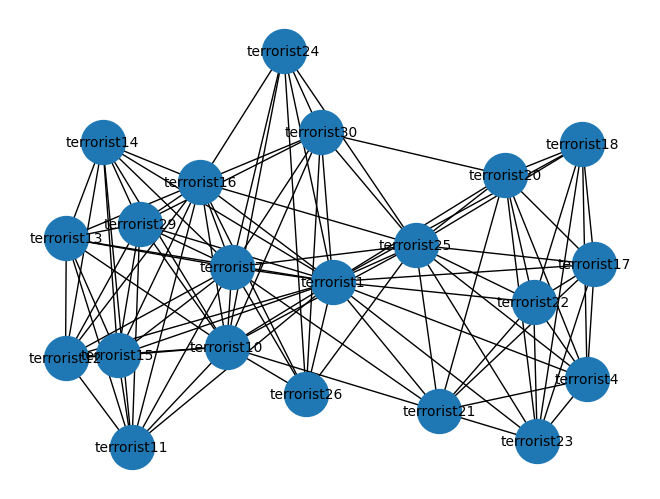

In [113]:
k_cores = nx.k_core(G,k=6)
nx.draw(k_cores, with_labels=True, labels=nx.get_node_attributes(k_cores, 'label'), node_size=1000, font_size=10)

In [114]:
# kliki
clicks = nx.find_cliques(G)
clicks = list(clicks)
#zeby nie bylo kilk z 2 elemntami
clicks = [sorted(click) for click in clicks if len(click) > 2]
clicks = [click for click in clicks if len(click) == max([len(click) for click in clicks])]
clicks
# plot clicks
print(f'Kliki terrorystów:')
for click in clicks:
    names = [G.nodes[node]['label'] for node in click]
    print(f'klika: {names}')

Kliki terrorystów:
klika: ['terrorist1', 'terrorist7', 'terrorist10', 'terrorist11', 'terrorist12', 'terrorist13', 'terrorist14', 'terrorist15', 'terrorist16', 'terrorist29']


In [115]:
degree = G.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 7.264705882352941


Text(0.5, 1.0, 'Stopień wierzchołka')

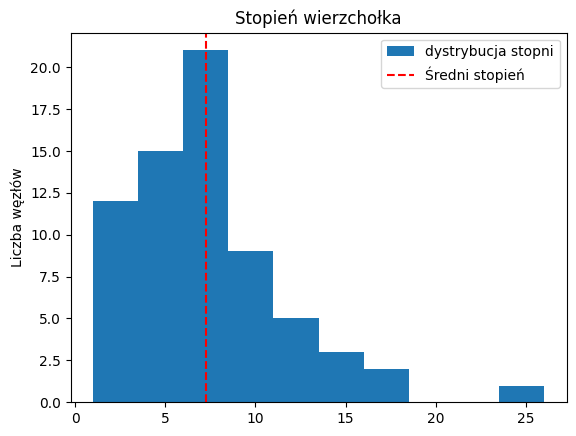

In [116]:
plt.hist(degree_list,label='dystrybucja stopni')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Średni stopień')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Stopień wierzchołka')


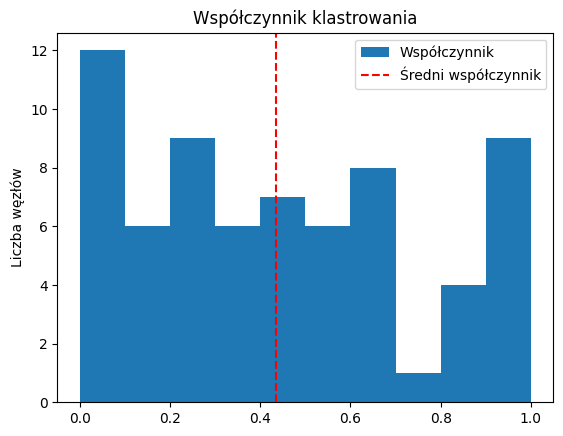

In [117]:
local_clustering_coefficient = nx.algorithms.cluster.clustering(G)


av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)


plt.hist(local_clustering_coefficient.values(),label='Współczynnik')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Średni współczynnik')
plt.legend()
plt.ylabel('Liczba węzłów')
plt.title('Współczynnik klastrowania')
plt.show()

In [118]:
nx.diameter(G)

5

In [119]:
nx.average_clustering(G)

0.43371684783882014

In [120]:
G.nodes()

NodeView((1, 2, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73))

In [121]:
nx.shortest_path(G, source=2, target=73)

[2, 1, 19, 57, 70, 73]